# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

In [4]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv"

### Step 3. Assign it to a variable called chipo.

In [7]:
chipo = pd.read_csv(url, sep='\t')
print(chipo.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


### Step 4. See the first 10 entries

In [8]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. Create a histogram of the top 5 items bought

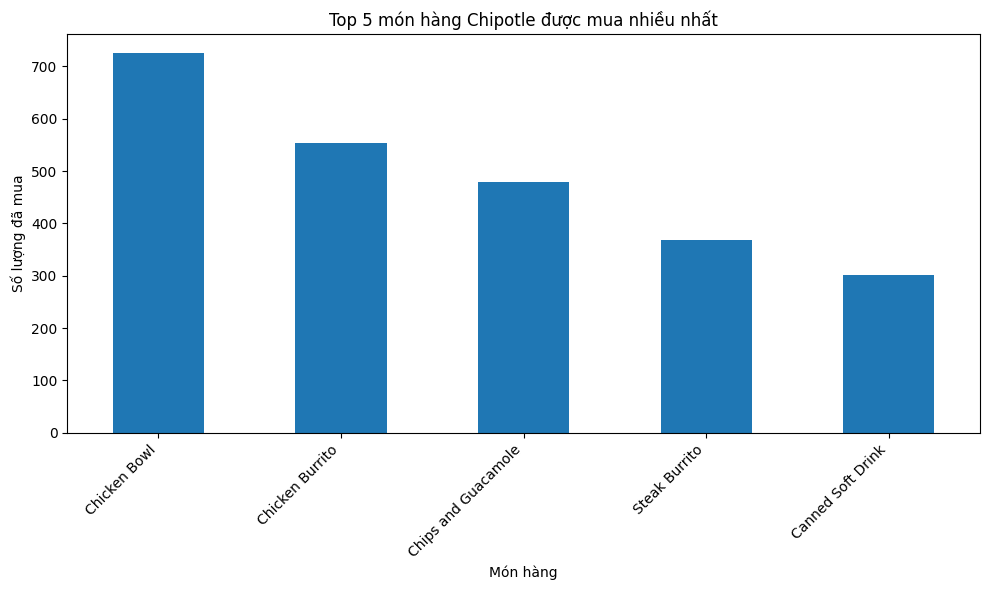

In [9]:

item_counts = chipo['item_name'].value_counts()
top_5_items = item_counts.head(5)
plt.figure(figsize=(10, 6))
top_5_items.plot(kind='bar')

plt.xlabel('Món hàng')
plt.ylabel('Số lượng đã mua')
plt.title('Top 5 món hàng Chipotle được mua nhiều nhất')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

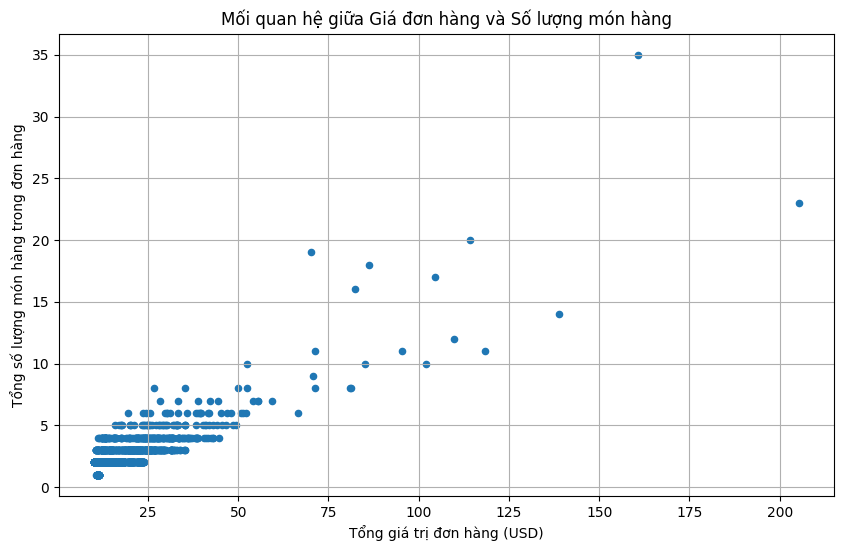

In [10]:

chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
order_summary = chipo.groupby('order_id').agg({
    'quantity': 'sum',
    'item_price': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(x=order_summary['item_price'], y=order_summary['quantity'], s=20)

plt.xlabel('Tổng giá trị đơn hàng (USD)')
plt.ylabel('Tổng số lượng món hàng trong đơn hàng')
plt.title('Mối quan hệ giữa Giá đơn hàng và Số lượng món hàng')
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

Giá trung bình của mỗi đơn hàng Chipotle là: $18.81


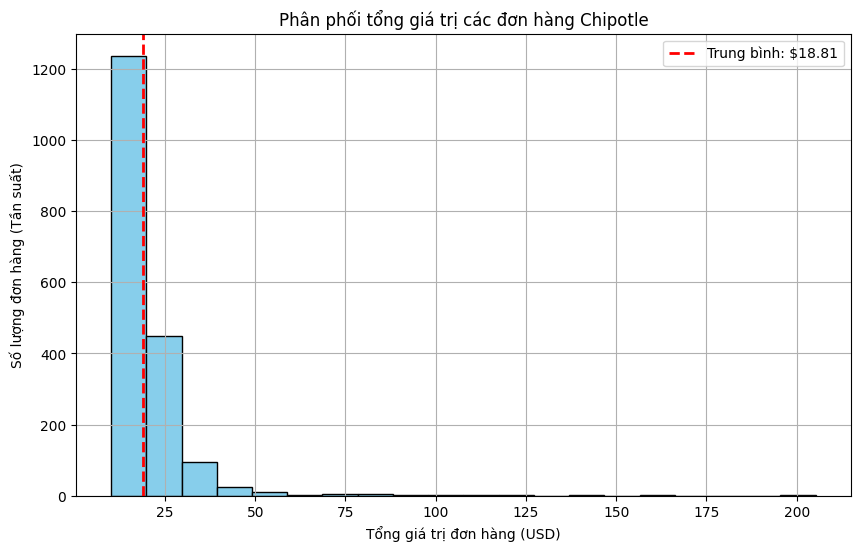

In [11]:

average_order_price = order_summary['item_price'].mean()

print(f"Giá trung bình của mỗi đơn hàng Chipotle là: ${average_order_price:,.2f}")
plt.figure(figsize=(10, 6))
order_summary['item_price'].hist(bins=20, edgecolor='black', color='skyblue')
plt.axvline(average_order_price, color='red', linestyle='dashed', linewidth=2, label=f'Trung bình: ${average_order_price:,.2f}')

plt.xlabel('Tổng giá trị đơn hàng (USD)')
plt.ylabel('Số lượng đơn hàng (Tần suất)')
plt.title('Phân phối tổng giá trị các đơn hàng Chipotle')
plt.legend()
plt.show()